# How to build the dataset of recipes from [giallozafferano.it](https://www.giallozafferano.it/)

In [ ]:
# -*- coding: utf-8 -*-
import requests
from bs4 import BeautifulSoup
import re
import json


def get_max_pages_each():
    global url
    global pages
    max_pages_each = list()
    for i in range(len(pages)):
        print(url+'/'+pages[i])
        response = requests.get(url+'/'+pages[i])
        print(response)
        soup = BeautifulSoup(response.text, "html.parser")
        num = soup.find('span', class_='disabled total-pages')
        max_pages_each.append(int(num.text))
    return max_pages_each


url = 'https://giallozafferano.it/ricette-cat'
pages = ['Antipasti', 'Primi', 'Secondi-piatti',
         'Contorni', 'Dolci-e-Desserts', 'Lievitati', 'Piatti-Unici']
max_pages_each = get_max_pages_each()

with open('gz_links.json', mode='w', encoding='utf-8') as fp:
    Rlinks = list()
    for i in range(len(pages)):
        for j in range(max_pages_each[i]):
            # https://www.giallozafferano.it/ricette-cat/page2/Antipasti/
            page_url = url+'/page'+str(j+1)+'/'+pages[i]
            print(f'Getting: {page_url}')
            response = requests.get(page_url)
            soup = BeautifulSoup(response.text, "html.parser")

            links = soup.find_all('h2', class_='gz-title')
            for x in range(len(links)):
                links[x] = links[x].a['href']
            Rlinks += links
    
    Rlinks = list(dict.fromkeys(Rlinks)) # Remove possible duplicate links
    fp.write(json.dumps(Rlinks, indent=4, sort_keys=False))
    print('Done collecting links')

https://giallozafferano.it/ricette-cat/Antipasti
<Response [200]>
https://giallozafferano.it/ricette-cat/Primi
<Response [200]>
https://giallozafferano.it/ricette-cat/Secondi-piatti
<Response [200]>
https://giallozafferano.it/ricette-cat/Contorni
<Response [200]>
https://giallozafferano.it/ricette-cat/Dolci-e-Desserts
<Response [200]>
https://giallozafferano.it/ricette-cat/Lievitati
<Response [200]>
https://giallozafferano.it/ricette-cat/Piatti-Unici
<Response [200]>
Getting: https://giallozafferano.it/ricette-cat/page1/Antipasti
Getting: https://giallozafferano.it/ricette-cat/page2/Antipasti
Getting: https://giallozafferano.it/ricette-cat/page3/Antipasti
Getting: https://giallozafferano.it/ricette-cat/page4/Antipasti
Getting: https://giallozafferano.it/ricette-cat/page5/Antipasti
Getting: https://giallozafferano.it/ricette-cat/page6/Antipasti
Getting: https://giallozafferano.it/ricette-cat/page7/Antipasti
Getting: https://giallozafferano.it/ricette-cat/page8/Antipasti
Getting: https:/

At the end you will have the file gz_links.json with a list of URLs pointing to the recipes

```json
[
    "https://ricette.giallozafferano.it/Hummus.html",
    "https://ricette.giallozafferano.it/Focaccia-fugassa-alla-genovese.html",
    ...
]
```

In [1]:
# -*- coding: utf-8 -*-
import urllib3
from bs4 import BeautifulSoup
import re
import json
import codecs
import lxml


class Recipe():
    def __init__(self, url):
        self.url = url

    def get(self):
        url = self.url
        http = urllib3.PoolManager()
        urllib3.disable_warnings()
        response = http.request('GET', url)
        html = codecs.decode(response.data, 'utf-8')
        soup = BeautifulSoup(html, "html.parser")

        # Title
        Rtitle = soup.find('h1', class_='gz-title-recipe').text

        # Ingredients
        ingredients = soup.find_all('dd', class_='gz-ingredient')
        Ringredients = list(dict())
        for i in range(len(ingredients)):
            Ringredients.append({'ingredient': ingredients[i].a.text, 'quantity': " ".join(
                ingredients[i].span.text.split())})

        # Preparation
        for i in soup.find_all(class_='num-step'):
            i.string = ''
        Rpreparation = ""
        preparation = soup.find_all('div', class_='gz-content-recipe-step')
        for i in range(len(preparation)):
            Rpreparation += preparation[i].text
        Rpreparation = re.sub('\s+', ' ', Rpreparation)
        
        Recipe = {'title': Rtitle, 'ingredients': Ringredients,
                  'preparation': Rpreparation}
        return Recipe

In [2]:
# -*- coding: utf-8 -*-
from get_recipes import Recipe
import json
import sys


def delete_last_line():
    sys.stdout.write('\x1b[1A')
    sys.stdout.write('\x1b[2K')


links = json.loads(open('gz_links.json', mode='r', encoding='utf-8').read())
n_links = len(links)
for i in range(n_links):
        delete_last_line()
        print(f'Getting {i} of {n_links} - {round(i/n_links*100,2)}% done.')
        filename = f'gzd{str(i)}.json'
        with open(filename, mode='w', encoding='utf-8') as fp:
                R = Recipe(links[i]).get()
                json.dump(R, fp, indent=4, sort_keys=False, ensure_ascii=False)
print(f'Done getting all {n_links} recipes.')

Getting 0 of 6084 - 0.0% done.
Getting 1 of 6084 - 0.02% done.
Getting 2 of 6084 - 0.03% done.
Getting 3 of 6084 - 0.05% done.
Getting 4 of 6084 - 0.07% done.
Getting 5 of 6084 - 0.08% done.
Getting 6 of 6084 - 0.1% done.
Getting 7 of 6084 - 0.12% done.
Getting 8 of 6084 - 0.13% done.
Getting 9 of 6084 - 0.15% done.
Getting 10 of 6084 - 0.16% done.
Getting 11 of 6084 - 0.18% done.
Getting 12 of 6084 - 0.2% done.
Getting 13 of 6084 - 0.21% done.
Getting 14 of 6084 - 0.23% done.
Getting 15 of 6084 - 0.25% done.
Getting 16 of 6084 - 0.26% done.
Getting 17 of 6084 - 0.28% done.
Getting 18 of 6084 - 0.3% done.
Getting 19 of 6084 - 0.31% done.
Getting 20 of 6084 - 0.33% done.
Getting 21 of 6084 - 0.35% done.
Getting 22 of 6084 - 0.36% done.
Getting 23 of 6084 - 0.38% done.
Getting 24 of 6084 - 0.39% done.
Getting 25 of 6084 - 0.41% done.
Getting 26 of 6084 - 0.43% done.
Getting 27 of 6084 - 0.44% done.
Getting 28 of 6084 - 0.46% done.
Getting 29 of 6084 - 0.48% done.
Getting 30 of 6084 - 0.4

Getting 200 of 6084 - 3.29% done.
Getting 201 of 6084 - 3.3% done.
Getting 202 of 6084 - 3.32% done.
Getting 203 of 6084 - 3.34% done.
Getting 204 of 6084 - 3.35% done.
Getting 205 of 6084 - 3.37% done.
Getting 206 of 6084 - 3.39% done.
Getting 207 of 6084 - 3.4% done.
Getting 208 of 6084 - 3.42% done.
Getting 209 of 6084 - 3.44% done.
Getting 210 of 6084 - 3.45% done.
Getting 211 of 6084 - 3.47% done.
Getting 212 of 6084 - 3.48% done.
Getting 213 of 6084 - 3.5% done.
Getting 214 of 6084 - 3.52% done.
Getting 215 of 6084 - 3.53% done.
Getting 216 of 6084 - 3.55% done.
Getting 217 of 6084 - 3.57% done.
Getting 218 of 6084 - 3.58% done.
Getting 219 of 6084 - 3.6% done.
Getting 220 of 6084 - 3.62% done.
Getting 221 of 6084 - 3.63% done.
Getting 222 of 6084 - 3.65% done.
Getting 223 of 6084 - 3.67% done.
Getting 224 of 6084 - 3.68% done.
Getting 225 of 6084 - 3.7% done.
Getting 226 of 6084 - 3.71% done.
Getting 227 of 6084 - 3.73% done.
Getting 228 of 6084 - 3.75% done.
Getting 229 of 6084

Getting 396 of 6084 - 6.51% done.
Getting 397 of 6084 - 6.53% done.
Getting 398 of 6084 - 6.54% done.
Getting 399 of 6084 - 6.56% done.
Getting 400 of 6084 - 6.57% done.
Getting 401 of 6084 - 6.59% done.
Getting 402 of 6084 - 6.61% done.
Getting 403 of 6084 - 6.62% done.
Getting 404 of 6084 - 6.64% done.
Getting 405 of 6084 - 6.66% done.
Getting 406 of 6084 - 6.67% done.
Getting 407 of 6084 - 6.69% done.
Getting 408 of 6084 - 6.71% done.
Getting 409 of 6084 - 6.72% done.
Getting 410 of 6084 - 6.74% done.
Getting 411 of 6084 - 6.76% done.
Getting 412 of 6084 - 6.77% done.
Getting 413 of 6084 - 6.79% done.
Getting 414 of 6084 - 6.8% done.
Getting 415 of 6084 - 6.82% done.
Getting 416 of 6084 - 6.84% done.
Getting 417 of 6084 - 6.85% done.
Getting 418 of 6084 - 6.87% done.
Getting 419 of 6084 - 6.89% done.
Getting 420 of 6084 - 6.9% done.
Getting 421 of 6084 - 6.92% done.
Getting 422 of 6084 - 6.94% done.
Getting 423 of 6084 - 6.95% done.
Getting 424 of 6084 - 6.97% done.
Getting 425 of 6

Getting 592 of 6084 - 9.73% done.
Getting 593 of 6084 - 9.75% done.
Getting 594 of 6084 - 9.76% done.
Getting 595 of 6084 - 9.78% done.
Getting 596 of 6084 - 9.8% done.
Getting 597 of 6084 - 9.81% done.
Getting 598 of 6084 - 9.83% done.
Getting 599 of 6084 - 9.85% done.
Getting 600 of 6084 - 9.86% done.
Getting 601 of 6084 - 9.88% done.
Getting 602 of 6084 - 9.89% done.
Getting 603 of 6084 - 9.91% done.
Getting 604 of 6084 - 9.93% done.
Getting 605 of 6084 - 9.94% done.
Getting 606 of 6084 - 9.96% done.
Getting 607 of 6084 - 9.98% done.
Getting 608 of 6084 - 9.99% done.
Getting 609 of 6084 - 10.01% done.
Getting 610 of 6084 - 10.03% done.
Getting 611 of 6084 - 10.04% done.
Getting 612 of 6084 - 10.06% done.
Getting 613 of 6084 - 10.08% done.
Getting 614 of 6084 - 10.09% done.
Getting 615 of 6084 - 10.11% done.
Getting 616 of 6084 - 10.12% done.
Getting 617 of 6084 - 10.14% done.
Getting 618 of 6084 - 10.16% done.
Getting 619 of 6084 - 10.17% done.
Getting 620 of 6084 - 10.19% done.
Get

Getting 784 of 6084 - 12.89% done.
Getting 785 of 6084 - 12.9% done.
Getting 786 of 6084 - 12.92% done.
Getting 787 of 6084 - 12.94% done.
Getting 788 of 6084 - 12.95% done.
Getting 789 of 6084 - 12.97% done.
Getting 790 of 6084 - 12.98% done.
Getting 791 of 6084 - 13.0% done.
Getting 792 of 6084 - 13.02% done.
Getting 793 of 6084 - 13.03% done.
Getting 794 of 6084 - 13.05% done.
Getting 795 of 6084 - 13.07% done.
Getting 796 of 6084 - 13.08% done.
Getting 797 of 6084 - 13.1% done.
Getting 798 of 6084 - 13.12% done.
Getting 799 of 6084 - 13.13% done.
Getting 800 of 6084 - 13.15% done.
Getting 801 of 6084 - 13.17% done.
Getting 802 of 6084 - 13.18% done.
Getting 803 of 6084 - 13.2% done.
Getting 804 of 6084 - 13.21% done.
Getting 805 of 6084 - 13.23% done.
Getting 806 of 6084 - 13.25% done.
Getting 807 of 6084 - 13.26% done.
Getting 808 of 6084 - 13.28% done.
Getting 809 of 6084 - 13.3% done.
Getting 810 of 6084 - 13.31% done.
Getting 811 of 6084 - 13.33% done.
Getting 812 of 6084 - 13.

Getting 975 of 6084 - 16.03% done.
Getting 976 of 6084 - 16.04% done.
Getting 977 of 6084 - 16.06% done.
Getting 978 of 6084 - 16.07% done.
Getting 979 of 6084 - 16.09% done.
Getting 980 of 6084 - 16.11% done.
Getting 981 of 6084 - 16.12% done.
Getting 982 of 6084 - 16.14% done.
Getting 983 of 6084 - 16.16% done.
Getting 984 of 6084 - 16.17% done.
Getting 985 of 6084 - 16.19% done.
Getting 986 of 6084 - 16.21% done.
Getting 987 of 6084 - 16.22% done.
Getting 988 of 6084 - 16.24% done.
Getting 989 of 6084 - 16.26% done.
Getting 990 of 6084 - 16.27% done.
Getting 991 of 6084 - 16.29% done.
Getting 992 of 6084 - 16.31% done.
Getting 993 of 6084 - 16.32% done.
Getting 994 of 6084 - 16.34% done.
Getting 995 of 6084 - 16.35% done.
Getting 996 of 6084 - 16.37% done.
Getting 997 of 6084 - 16.39% done.
Getting 998 of 6084 - 16.4% done.
Getting 999 of 6084 - 16.42% done.
Getting 1000 of 6084 - 16.44% done.
Getting 1001 of 6084 - 16.45% done.
Getting 1002 of 6084 - 16.47% done.
Getting 1003 of 60

Getting 1163 of 6084 - 19.12% done.
Getting 1164 of 6084 - 19.13% done.
Getting 1165 of 6084 - 19.15% done.
Getting 1166 of 6084 - 19.17% done.
Getting 1167 of 6084 - 19.18% done.
Getting 1168 of 6084 - 19.2% done.
Getting 1169 of 6084 - 19.21% done.
Getting 1170 of 6084 - 19.23% done.
Getting 1171 of 6084 - 19.25% done.
Getting 1172 of 6084 - 19.26% done.
Getting 1173 of 6084 - 19.28% done.
Getting 1174 of 6084 - 19.3% done.
Getting 1175 of 6084 - 19.31% done.
Getting 1176 of 6084 - 19.33% done.
Getting 1177 of 6084 - 19.35% done.
Getting 1178 of 6084 - 19.36% done.
Getting 1179 of 6084 - 19.38% done.
Getting 1180 of 6084 - 19.4% done.
Getting 1181 of 6084 - 19.41% done.
Getting 1182 of 6084 - 19.43% done.
Getting 1183 of 6084 - 19.44% done.
Getting 1184 of 6084 - 19.46% done.
Getting 1185 of 6084 - 19.48% done.
Getting 1186 of 6084 - 19.49% done.
Getting 1187 of 6084 - 19.51% done.
Getting 1188 of 6084 - 19.53% done.
Getting 1189 of 6084 - 19.54% done.
Getting 1190 of 6084 - 19.56% d

Getting 1350 of 6084 - 22.19% done.
Getting 1351 of 6084 - 22.21% done.
Getting 1352 of 6084 - 22.22% done.
Getting 1353 of 6084 - 22.24% done.
Getting 1354 of 6084 - 22.26% done.
Getting 1355 of 6084 - 22.27% done.
Getting 1356 of 6084 - 22.29% done.
Getting 1357 of 6084 - 22.3% done.
Getting 1358 of 6084 - 22.32% done.
Getting 1359 of 6084 - 22.34% done.
Getting 1360 of 6084 - 22.35% done.
Getting 1361 of 6084 - 22.37% done.
Getting 1362 of 6084 - 22.39% done.
Getting 1363 of 6084 - 22.4% done.
Getting 1364 of 6084 - 22.42% done.
Getting 1365 of 6084 - 22.44% done.
Getting 1366 of 6084 - 22.45% done.
Getting 1367 of 6084 - 22.47% done.
Getting 1368 of 6084 - 22.49% done.
Getting 1369 of 6084 - 22.5% done.
Getting 1370 of 6084 - 22.52% done.
Getting 1371 of 6084 - 22.53% done.
Getting 1372 of 6084 - 22.55% done.
Getting 1373 of 6084 - 22.57% done.
Getting 1374 of 6084 - 22.58% done.
Getting 1375 of 6084 - 22.6% done.
Getting 1376 of 6084 - 22.62% done.
Getting 1377 of 6084 - 22.63% do

Getting 1537 of 6084 - 25.26% done.
Getting 1538 of 6084 - 25.28% done.
Getting 1539 of 6084 - 25.3% done.
Getting 1540 of 6084 - 25.31% done.
Getting 1541 of 6084 - 25.33% done.
Getting 1542 of 6084 - 25.35% done.
Getting 1543 of 6084 - 25.36% done.
Getting 1544 of 6084 - 25.38% done.
Getting 1545 of 6084 - 25.39% done.
Getting 1546 of 6084 - 25.41% done.
Getting 1547 of 6084 - 25.43% done.
Getting 1548 of 6084 - 25.44% done.
Getting 1549 of 6084 - 25.46% done.
Getting 1550 of 6084 - 25.48% done.
Getting 1551 of 6084 - 25.49% done.
Getting 1552 of 6084 - 25.51% done.
Getting 1553 of 6084 - 25.53% done.
Getting 1554 of 6084 - 25.54% done.
Getting 1555 of 6084 - 25.56% done.
Getting 1556 of 6084 - 25.58% done.
Getting 1557 of 6084 - 25.59% done.
Getting 1558 of 6084 - 25.61% done.
Getting 1559 of 6084 - 25.62% done.
Getting 1560 of 6084 - 25.64% done.
Getting 1561 of 6084 - 25.66% done.
Getting 1562 of 6084 - 25.67% done.
Getting 1563 of 6084 - 25.69% done.
Getting 1564 of 6084 - 25.71%

Getting 1724 of 6084 - 28.34% done.
Getting 1725 of 6084 - 28.35% done.
Getting 1726 of 6084 - 28.37% done.
Getting 1727 of 6084 - 28.39% done.
Getting 1728 of 6084 - 28.4% done.
Getting 1729 of 6084 - 28.42% done.
Getting 1730 of 6084 - 28.44% done.
Getting 1731 of 6084 - 28.45% done.
Getting 1732 of 6084 - 28.47% done.
Getting 1733 of 6084 - 28.48% done.
Getting 1734 of 6084 - 28.5% done.
Getting 1735 of 6084 - 28.52% done.
Getting 1736 of 6084 - 28.53% done.
Getting 1737 of 6084 - 28.55% done.
Getting 1738 of 6084 - 28.57% done.
Getting 1739 of 6084 - 28.58% done.
Getting 1740 of 6084 - 28.6% done.
Getting 1741 of 6084 - 28.62% done.
Getting 1742 of 6084 - 28.63% done.
Getting 1743 of 6084 - 28.65% done.
Getting 1744 of 6084 - 28.67% done.
Getting 1745 of 6084 - 28.68% done.
Getting 1746 of 6084 - 28.7% done.
Getting 1747 of 6084 - 28.71% done.
Getting 1748 of 6084 - 28.73% done.
Getting 1749 of 6084 - 28.75% done.
Getting 1750 of 6084 - 28.76% done.
Getting 1751 of 6084 - 28.78% do

Getting 1911 of 6084 - 31.41% done.
Getting 1912 of 6084 - 31.43% done.
Getting 1913 of 6084 - 31.44% done.
Getting 1914 of 6084 - 31.46% done.
Getting 1915 of 6084 - 31.48% done.
Getting 1916 of 6084 - 31.49% done.
Getting 1917 of 6084 - 31.51% done.
Getting 1918 of 6084 - 31.53% done.
Getting 1919 of 6084 - 31.54% done.
Getting 1920 of 6084 - 31.56% done.
Getting 1921 of 6084 - 31.57% done.
Getting 1922 of 6084 - 31.59% done.
Getting 1923 of 6084 - 31.61% done.
Getting 1924 of 6084 - 31.62% done.
Getting 1925 of 6084 - 31.64% done.
Getting 1926 of 6084 - 31.66% done.
Getting 1927 of 6084 - 31.67% done.
Getting 1928 of 6084 - 31.69% done.
Getting 1929 of 6084 - 31.71% done.
Getting 1930 of 6084 - 31.72% done.
Getting 1931 of 6084 - 31.74% done.
Getting 1932 of 6084 - 31.76% done.
Getting 1933 of 6084 - 31.77% done.
Getting 1934 of 6084 - 31.79% done.
Getting 1935 of 6084 - 31.8% done.
Getting 1936 of 6084 - 31.82% done.
Getting 1937 of 6084 - 31.84% done.
Getting 1938 of 6084 - 31.85%

Getting 2098 of 6084 - 34.48% done.
Getting 2099 of 6084 - 34.5% done.
Getting 2100 of 6084 - 34.52% done.
Getting 2101 of 6084 - 34.53% done.
Getting 2102 of 6084 - 34.55% done.
Getting 2103 of 6084 - 34.57% done.
Getting 2104 of 6084 - 34.58% done.
Getting 2105 of 6084 - 34.6% done.
Getting 2106 of 6084 - 34.62% done.
Getting 2107 of 6084 - 34.63% done.
Getting 2108 of 6084 - 34.65% done.
Getting 2109 of 6084 - 34.66% done.
Getting 2110 of 6084 - 34.68% done.
Getting 2111 of 6084 - 34.7% done.
Getting 2112 of 6084 - 34.71% done.
Getting 2113 of 6084 - 34.73% done.
Getting 2114 of 6084 - 34.75% done.
Getting 2115 of 6084 - 34.76% done.
Getting 2116 of 6084 - 34.78% done.
Getting 2117 of 6084 - 34.8% done.
Getting 2118 of 6084 - 34.81% done.
Getting 2119 of 6084 - 34.83% done.
Getting 2120 of 6084 - 34.85% done.
Getting 2121 of 6084 - 34.86% done.
Getting 2122 of 6084 - 34.88% done.
Getting 2123 of 6084 - 34.89% done.
Getting 2124 of 6084 - 34.91% done.
Getting 2125 of 6084 - 34.93% do

Getting 2285 of 6084 - 37.56% done.
Getting 2286 of 6084 - 37.57% done.
Getting 2287 of 6084 - 37.59% done.
Getting 2288 of 6084 - 37.61% done.
Getting 2289 of 6084 - 37.62% done.
Getting 2290 of 6084 - 37.64% done.
Getting 2291 of 6084 - 37.66% done.
Getting 2292 of 6084 - 37.67% done.
Getting 2293 of 6084 - 37.69% done.
Getting 2294 of 6084 - 37.71% done.
Getting 2295 of 6084 - 37.72% done.
Getting 2296 of 6084 - 37.74% done.
Getting 2297 of 6084 - 37.75% done.
Getting 2298 of 6084 - 37.77% done.
Getting 2299 of 6084 - 37.79% done.
Getting 2300 of 6084 - 37.8% done.
Getting 2301 of 6084 - 37.82% done.
Getting 2302 of 6084 - 37.84% done.
Getting 2303 of 6084 - 37.85% done.
Getting 2304 of 6084 - 37.87% done.
Getting 2305 of 6084 - 37.89% done.
Getting 2306 of 6084 - 37.9% done.
Getting 2307 of 6084 - 37.92% done.
Getting 2308 of 6084 - 37.94% done.
Getting 2309 of 6084 - 37.95% done.
Getting 2310 of 6084 - 37.97% done.
Getting 2311 of 6084 - 37.98% done.
Getting 2312 of 6084 - 38.0% d

Getting 2472 of 6084 - 40.63% done.
Getting 2473 of 6084 - 40.65% done.
Getting 2474 of 6084 - 40.66% done.
Getting 2475 of 6084 - 40.68% done.
Getting 2476 of 6084 - 40.7% done.
Getting 2477 of 6084 - 40.71% done.
Getting 2478 of 6084 - 40.73% done.
Getting 2479 of 6084 - 40.75% done.
Getting 2480 of 6084 - 40.76% done.
Getting 2481 of 6084 - 40.78% done.
Getting 2482 of 6084 - 40.8% done.
Getting 2483 of 6084 - 40.81% done.
Getting 2484 of 6084 - 40.83% done.
Getting 2485 of 6084 - 40.84% done.
Getting 2486 of 6084 - 40.86% done.
Getting 2487 of 6084 - 40.88% done.
Getting 2488 of 6084 - 40.89% done.
Getting 2489 of 6084 - 40.91% done.
Getting 2490 of 6084 - 40.93% done.
Getting 2491 of 6084 - 40.94% done.
Getting 2492 of 6084 - 40.96% done.
Getting 2493 of 6084 - 40.98% done.
Getting 2494 of 6084 - 40.99% done.
Getting 2495 of 6084 - 41.01% done.
Getting 2496 of 6084 - 41.03% done.
Getting 2497 of 6084 - 41.04% done.
Getting 2498 of 6084 - 41.06% done.
Getting 2499 of 6084 - 41.07% 

Getting 2659 of 6084 - 43.7% done.
Getting 2660 of 6084 - 43.72% done.
Getting 2661 of 6084 - 43.74% done.
Getting 2662 of 6084 - 43.75% done.
Getting 2663 of 6084 - 43.77% done.
Getting 2664 of 6084 - 43.79% done.
Getting 2665 of 6084 - 43.8% done.
Getting 2666 of 6084 - 43.82% done.
Getting 2667 of 6084 - 43.84% done.
Getting 2668 of 6084 - 43.85% done.
Getting 2669 of 6084 - 43.87% done.
Getting 2670 of 6084 - 43.89% done.
Getting 2671 of 6084 - 43.9% done.
Getting 2672 of 6084 - 43.92% done.
Getting 2673 of 6084 - 43.93% done.
Getting 2674 of 6084 - 43.95% done.
Getting 2675 of 6084 - 43.97% done.
Getting 2676 of 6084 - 43.98% done.
Getting 2677 of 6084 - 44.0% done.
Getting 2678 of 6084 - 44.02% done.
Getting 2679 of 6084 - 44.03% done.
Getting 2680 of 6084 - 44.05% done.
Getting 2681 of 6084 - 44.07% done.
Getting 2682 of 6084 - 44.08% done.
Getting 2683 of 6084 - 44.1% done.
Getting 2684 of 6084 - 44.12% done.
Getting 2685 of 6084 - 44.13% done.
Getting 2686 of 6084 - 44.15% don

Getting 2847 of 6084 - 46.79% done.
Getting 2848 of 6084 - 46.81% done.
Getting 2849 of 6084 - 46.83% done.
Getting 2850 of 6084 - 46.84% done.
Getting 2851 of 6084 - 46.86% done.
Getting 2852 of 6084 - 46.88% done.
Getting 2853 of 6084 - 46.89% done.
Getting 2854 of 6084 - 46.91% done.
Getting 2855 of 6084 - 46.93% done.
Getting 2856 of 6084 - 46.94% done.
Getting 2857 of 6084 - 46.96% done.
Getting 2858 of 6084 - 46.98% done.
Getting 2859 of 6084 - 46.99% done.
Getting 2860 of 6084 - 47.01% done.
Getting 2861 of 6084 - 47.02% done.
Getting 2862 of 6084 - 47.04% done.
Getting 2863 of 6084 - 47.06% done.
Getting 2864 of 6084 - 47.07% done.
Getting 2865 of 6084 - 47.09% done.
Getting 2866 of 6084 - 47.11% done.
Getting 2867 of 6084 - 47.12% done.
Getting 2868 of 6084 - 47.14% done.
Getting 2869 of 6084 - 47.16% done.
Getting 2870 of 6084 - 47.17% done.
Getting 2871 of 6084 - 47.19% done.
Getting 2872 of 6084 - 47.21% done.
Getting 2873 of 6084 - 47.22% done.
Getting 2874 of 6084 - 47.24

Getting 3034 of 6084 - 49.87% done.
Getting 3035 of 6084 - 49.88% done.
Getting 3036 of 6084 - 49.9% done.
Getting 3037 of 6084 - 49.92% done.
Getting 3038 of 6084 - 49.93% done.
Getting 3039 of 6084 - 49.95% done.
Getting 3040 of 6084 - 49.97% done.
Getting 3041 of 6084 - 49.98% done.
Getting 3042 of 6084 - 50.0% done.
Getting 3043 of 6084 - 50.02% done.
Getting 3044 of 6084 - 50.03% done.
Getting 3045 of 6084 - 50.05% done.
Getting 3046 of 6084 - 50.07% done.
Getting 3047 of 6084 - 50.08% done.
Getting 3048 of 6084 - 50.1% done.
Getting 3049 of 6084 - 50.12% done.
Getting 3050 of 6084 - 50.13% done.
Getting 3051 of 6084 - 50.15% done.
Getting 3052 of 6084 - 50.16% done.
Getting 3053 of 6084 - 50.18% done.
Getting 3054 of 6084 - 50.2% done.
Getting 3055 of 6084 - 50.21% done.
Getting 3056 of 6084 - 50.23% done.
Getting 3057 of 6084 - 50.25% done.
Getting 3058 of 6084 - 50.26% done.
Getting 3059 of 6084 - 50.28% done.
Getting 3060 of 6084 - 50.3% done.
Getting 3061 of 6084 - 50.31% don

Getting 3221 of 6084 - 52.94% done.
Getting 3222 of 6084 - 52.96% done.
Getting 3223 of 6084 - 52.98% done.
Getting 3224 of 6084 - 52.99% done.
Getting 3225 of 6084 - 53.01% done.
Getting 3226 of 6084 - 53.02% done.
Getting 3227 of 6084 - 53.04% done.
Getting 3228 of 6084 - 53.06% done.
Getting 3229 of 6084 - 53.07% done.
Getting 3230 of 6084 - 53.09% done.
Getting 3231 of 6084 - 53.11% done.
Getting 3232 of 6084 - 53.12% done.
Getting 3233 of 6084 - 53.14% done.
Getting 3234 of 6084 - 53.16% done.
Getting 3235 of 6084 - 53.17% done.
Getting 3236 of 6084 - 53.19% done.
Getting 3237 of 6084 - 53.21% done.
Getting 3238 of 6084 - 53.22% done.
Getting 3239 of 6084 - 53.24% done.
Getting 3240 of 6084 - 53.25% done.
Getting 3241 of 6084 - 53.27% done.
Getting 3242 of 6084 - 53.29% done.
Getting 3243 of 6084 - 53.3% done.
Getting 3244 of 6084 - 53.32% done.
Getting 3245 of 6084 - 53.34% done.
Getting 3246 of 6084 - 53.35% done.
Getting 3247 of 6084 - 53.37% done.
Getting 3248 of 6084 - 53.39%

Getting 3409 of 6084 - 56.03% done.
Getting 3410 of 6084 - 56.05% done.
Getting 3411 of 6084 - 56.07% done.
Getting 3412 of 6084 - 56.08% done.
Getting 3413 of 6084 - 56.1% done.
Getting 3414 of 6084 - 56.11% done.
Getting 3415 of 6084 - 56.13% done.
Getting 3416 of 6084 - 56.15% done.
Getting 3417 of 6084 - 56.16% done.
Getting 3418 of 6084 - 56.18% done.
Getting 3419 of 6084 - 56.2% done.
Getting 3420 of 6084 - 56.21% done.
Getting 3421 of 6084 - 56.23% done.
Getting 3422 of 6084 - 56.25% done.
Getting 3423 of 6084 - 56.26% done.
Getting 3424 of 6084 - 56.28% done.
Getting 3425 of 6084 - 56.3% done.
Getting 3426 of 6084 - 56.31% done.
Getting 3427 of 6084 - 56.33% done.
Getting 3428 of 6084 - 56.34% done.
Getting 3429 of 6084 - 56.36% done.
Getting 3430 of 6084 - 56.38% done.
Getting 3431 of 6084 - 56.39% done.
Getting 3432 of 6084 - 56.41% done.
Getting 3433 of 6084 - 56.43% done.
Getting 3434 of 6084 - 56.44% done.
Getting 3435 of 6084 - 56.46% done.
Getting 3436 of 6084 - 56.48% d

Getting 3596 of 6084 - 59.11% done.
Getting 3597 of 6084 - 59.12% done.
Getting 3598 of 6084 - 59.14% done.
Getting 3599 of 6084 - 59.16% done.
Getting 3600 of 6084 - 59.17% done.
Getting 3601 of 6084 - 59.19% done.
Getting 3602 of 6084 - 59.2% done.
Getting 3603 of 6084 - 59.22% done.
Getting 3604 of 6084 - 59.24% done.
Getting 3605 of 6084 - 59.25% done.
Getting 3606 of 6084 - 59.27% done.
Getting 3607 of 6084 - 59.29% done.
Getting 3608 of 6084 - 59.3% done.
Getting 3609 of 6084 - 59.32% done.
Getting 3610 of 6084 - 59.34% done.
Getting 3611 of 6084 - 59.35% done.
Getting 3612 of 6084 - 59.37% done.
Getting 3613 of 6084 - 59.39% done.
Getting 3614 of 6084 - 59.4% done.
Getting 3615 of 6084 - 59.42% done.
Getting 3616 of 6084 - 59.43% done.
Getting 3617 of 6084 - 59.45% done.
Getting 3618 of 6084 - 59.47% done.
Getting 3619 of 6084 - 59.48% done.
Getting 3620 of 6084 - 59.5% done.
Getting 3621 of 6084 - 59.52% done.
Getting 3622 of 6084 - 59.53% done.
Getting 3623 of 6084 - 59.55% do

Getting 3783 of 6084 - 62.18% done.
Getting 3784 of 6084 - 62.2% done.
Getting 3785 of 6084 - 62.21% done.
Getting 3786 of 6084 - 62.23% done.
Getting 3787 of 6084 - 62.25% done.
Getting 3788 of 6084 - 62.26% done.
Getting 3789 of 6084 - 62.28% done.
Getting 3790 of 6084 - 62.29% done.
Getting 3791 of 6084 - 62.31% done.
Getting 3792 of 6084 - 62.33% done.
Getting 3793 of 6084 - 62.34% done.
Getting 3794 of 6084 - 62.36% done.
Getting 3795 of 6084 - 62.38% done.
Getting 3796 of 6084 - 62.39% done.
Getting 3797 of 6084 - 62.41% done.
Getting 3798 of 6084 - 62.43% done.
Getting 3799 of 6084 - 62.44% done.
Getting 3800 of 6084 - 62.46% done.
Getting 3801 of 6084 - 62.48% done.
Getting 3802 of 6084 - 62.49% done.
Getting 3803 of 6084 - 62.51% done.
Getting 3804 of 6084 - 62.52% done.
Getting 3805 of 6084 - 62.54% done.
Getting 3806 of 6084 - 62.56% done.
Getting 3807 of 6084 - 62.57% done.
Getting 3808 of 6084 - 62.59% done.
Getting 3809 of 6084 - 62.61% done.
Getting 3810 of 6084 - 62.62%

Getting 3970 of 6084 - 65.25% done.
Getting 3971 of 6084 - 65.27% done.
Getting 3972 of 6084 - 65.29% done.
Getting 3973 of 6084 - 65.3% done.
Getting 3974 of 6084 - 65.32% done.
Getting 3975 of 6084 - 65.34% done.
Getting 3976 of 6084 - 65.35% done.
Getting 3977 of 6084 - 65.37% done.
Getting 3978 of 6084 - 65.38% done.
Getting 3979 of 6084 - 65.4% done.
Getting 3980 of 6084 - 65.42% done.
Getting 3981 of 6084 - 65.43% done.
Getting 3982 of 6084 - 65.45% done.
Getting 3983 of 6084 - 65.47% done.
Getting 3984 of 6084 - 65.48% done.
Getting 3985 of 6084 - 65.5% done.
Getting 3986 of 6084 - 65.52% done.
Getting 3987 of 6084 - 65.53% done.
Getting 3988 of 6084 - 65.55% done.
Getting 3989 of 6084 - 65.57% done.
Getting 3990 of 6084 - 65.58% done.
Getting 3991 of 6084 - 65.6% done.
Getting 3992 of 6084 - 65.61% done.
Getting 3993 of 6084 - 65.63% done.
Getting 3994 of 6084 - 65.65% done.
Getting 3995 of 6084 - 65.66% done.
Getting 3996 of 6084 - 65.68% done.
Getting 3997 of 6084 - 65.7% don

Getting 4157 of 6084 - 68.33% done.
Getting 4158 of 6084 - 68.34% done.
Getting 4159 of 6084 - 68.36% done.
Getting 4160 of 6084 - 68.38% done.
Getting 4161 of 6084 - 68.39% done.
Getting 4162 of 6084 - 68.41% done.
Getting 4163 of 6084 - 68.43% done.
Getting 4164 of 6084 - 68.44% done.
Getting 4165 of 6084 - 68.46% done.
Getting 4166 of 6084 - 68.47% done.
Getting 4167 of 6084 - 68.49% done.
Getting 4168 of 6084 - 68.51% done.
Getting 4169 of 6084 - 68.52% done.
Getting 4170 of 6084 - 68.54% done.
Getting 4171 of 6084 - 68.56% done.
Getting 4172 of 6084 - 68.57% done.
Getting 4173 of 6084 - 68.59% done.
Getting 4174 of 6084 - 68.61% done.
Getting 4175 of 6084 - 68.62% done.
Getting 4176 of 6084 - 68.64% done.
Getting 4177 of 6084 - 68.66% done.
Getting 4178 of 6084 - 68.67% done.
Getting 4179 of 6084 - 68.69% done.
Getting 4180 of 6084 - 68.7% done.
Getting 4181 of 6084 - 68.72% done.
Getting 4182 of 6084 - 68.74% done.
Getting 4183 of 6084 - 68.75% done.
Getting 4184 of 6084 - 68.77%

Getting 4344 of 6084 - 71.4% done.
Getting 4345 of 6084 - 71.42% done.
Getting 4346 of 6084 - 71.43% done.
Getting 4347 of 6084 - 71.45% done.
Getting 4348 of 6084 - 71.47% done.
Getting 4349 of 6084 - 71.48% done.
Getting 4350 of 6084 - 71.5% done.
Getting 4351 of 6084 - 71.52% done.
Getting 4352 of 6084 - 71.53% done.
Getting 4353 of 6084 - 71.55% done.
Getting 4354 of 6084 - 71.56% done.
Getting 4355 of 6084 - 71.58% done.
Getting 4356 of 6084 - 71.6% done.
Getting 4357 of 6084 - 71.61% done.
Getting 4358 of 6084 - 71.63% done.
Getting 4359 of 6084 - 71.65% done.
Getting 4360 of 6084 - 71.66% done.
Getting 4361 of 6084 - 71.68% done.
Getting 4362 of 6084 - 71.7% done.
Getting 4363 of 6084 - 71.71% done.
Getting 4364 of 6084 - 71.73% done.
Getting 4365 of 6084 - 71.75% done.
Getting 4366 of 6084 - 71.76% done.
Getting 4367 of 6084 - 71.78% done.
Getting 4368 of 6084 - 71.79% done.
Getting 4369 of 6084 - 71.81% done.
Getting 4370 of 6084 - 71.83% done.
Getting 4371 of 6084 - 71.84% do

Getting 4531 of 6084 - 74.47% done.
Getting 4532 of 6084 - 74.49% done.
Getting 4533 of 6084 - 74.51% done.
Getting 4534 of 6084 - 74.52% done.
Getting 4535 of 6084 - 74.54% done.
Getting 4536 of 6084 - 74.56% done.
Getting 4537 of 6084 - 74.57% done.
Getting 4538 of 6084 - 74.59% done.
Getting 4539 of 6084 - 74.61% done.
Getting 4540 of 6084 - 74.62% done.
Getting 4541 of 6084 - 74.64% done.
Getting 4542 of 6084 - 74.65% done.
Getting 4543 of 6084 - 74.67% done.
Getting 4544 of 6084 - 74.69% done.
Getting 4545 of 6084 - 74.7% done.
Getting 4546 of 6084 - 74.72% done.
Getting 4547 of 6084 - 74.74% done.
Getting 4548 of 6084 - 74.75% done.
Getting 4549 of 6084 - 74.77% done.
Getting 4550 of 6084 - 74.79% done.
Getting 4551 of 6084 - 74.8% done.
Getting 4552 of 6084 - 74.82% done.
Getting 4553 of 6084 - 74.84% done.
Getting 4554 of 6084 - 74.85% done.
Getting 4555 of 6084 - 74.87% done.
Getting 4556 of 6084 - 74.88% done.
Getting 4557 of 6084 - 74.9% done.
Getting 4558 of 6084 - 74.92% d

Getting 4718 of 6084 - 77.55% done.
Getting 4719 of 6084 - 77.56% done.
Getting 4720 of 6084 - 77.58% done.
Getting 4721 of 6084 - 77.6% done.
Getting 4722 of 6084 - 77.61% done.
Getting 4723 of 6084 - 77.63% done.
Getting 4724 of 6084 - 77.65% done.
Getting 4725 of 6084 - 77.66% done.
Getting 4726 of 6084 - 77.68% done.
Getting 4727 of 6084 - 77.7% done.
Getting 4728 of 6084 - 77.71% done.
Getting 4729 of 6084 - 77.73% done.
Getting 4730 of 6084 - 77.74% done.
Getting 4731 of 6084 - 77.76% done.
Getting 4732 of 6084 - 77.78% done.
Getting 4733 of 6084 - 77.79% done.
Getting 4734 of 6084 - 77.81% done.
Getting 4735 of 6084 - 77.83% done.
Getting 4736 of 6084 - 77.84% done.
Getting 4737 of 6084 - 77.86% done.
Getting 4738 of 6084 - 77.88% done.
Getting 4739 of 6084 - 77.89% done.
Getting 4740 of 6084 - 77.91% done.
Getting 4741 of 6084 - 77.93% done.
Getting 4742 of 6084 - 77.94% done.
Getting 4743 of 6084 - 77.96% done.
Getting 4744 of 6084 - 77.98% done.
Getting 4745 of 6084 - 77.99% 

Getting 4905 of 6084 - 80.62% done.
Getting 4906 of 6084 - 80.64% done.
Getting 4907 of 6084 - 80.65% done.
Getting 4908 of 6084 - 80.67% done.
Getting 4909 of 6084 - 80.69% done.
Getting 4910 of 6084 - 80.7% done.
Getting 4911 of 6084 - 80.72% done.
Getting 4912 of 6084 - 80.74% done.
Getting 4913 of 6084 - 80.75% done.
Getting 4914 of 6084 - 80.77% done.
Getting 4915 of 6084 - 80.79% done.
Getting 4916 of 6084 - 80.8% done.
Getting 4917 of 6084 - 80.82% done.
Getting 4918 of 6084 - 80.83% done.
Getting 4919 of 6084 - 80.85% done.
Getting 4920 of 6084 - 80.87% done.
Getting 4921 of 6084 - 80.88% done.
Getting 4922 of 6084 - 80.9% done.
Getting 4923 of 6084 - 80.92% done.
Getting 4924 of 6084 - 80.93% done.
Getting 4925 of 6084 - 80.95% done.
Getting 4926 of 6084 - 80.97% done.
Getting 4927 of 6084 - 80.98% done.
Getting 4928 of 6084 - 81.0% done.
Getting 4929 of 6084 - 81.02% done.
Getting 4930 of 6084 - 81.03% done.
Getting 4931 of 6084 - 81.05% done.
Getting 4932 of 6084 - 81.07% do

Getting 5092 of 6084 - 83.69% done.
Getting 5093 of 6084 - 83.71% done.
Getting 5094 of 6084 - 83.73% done.
Getting 5095 of 6084 - 83.74% done.
Getting 5096 of 6084 - 83.76% done.
Getting 5097 of 6084 - 83.78% done.
Getting 5098 of 6084 - 83.79% done.
Getting 5099 of 6084 - 83.81% done.
Getting 5100 of 6084 - 83.83% done.
Getting 5101 of 6084 - 83.84% done.
Getting 5102 of 6084 - 83.86% done.
Getting 5103 of 6084 - 83.88% done.
Getting 5104 of 6084 - 83.89% done.
Getting 5105 of 6084 - 83.91% done.
Getting 5106 of 6084 - 83.93% done.
Getting 5107 of 6084 - 83.94% done.
Getting 5108 of 6084 - 83.96% done.
Getting 5109 of 6084 - 83.97% done.
Getting 5110 of 6084 - 83.99% done.
Getting 5111 of 6084 - 84.01% done.
Getting 5112 of 6084 - 84.02% done.
Getting 5113 of 6084 - 84.04% done.
Getting 5114 of 6084 - 84.06% done.
Getting 5115 of 6084 - 84.07% done.
Getting 5116 of 6084 - 84.09% done.
Getting 5117 of 6084 - 84.11% done.
Getting 5118 of 6084 - 84.12% done.
Getting 5119 of 6084 - 84.14

Getting 5279 of 6084 - 86.77% done.
Getting 5280 of 6084 - 86.79% done.
Getting 5281 of 6084 - 86.8% done.
Getting 5282 of 6084 - 86.82% done.
Getting 5283 of 6084 - 86.83% done.
Getting 5284 of 6084 - 86.85% done.
Getting 5285 of 6084 - 86.87% done.
Getting 5286 of 6084 - 86.88% done.
Getting 5287 of 6084 - 86.9% done.
Getting 5288 of 6084 - 86.92% done.
Getting 5289 of 6084 - 86.93% done.
Getting 5290 of 6084 - 86.95% done.
Getting 5291 of 6084 - 86.97% done.
Getting 5292 of 6084 - 86.98% done.
Getting 5293 of 6084 - 87.0% done.
Getting 5294 of 6084 - 87.02% done.
Getting 5295 of 6084 - 87.03% done.
Getting 5296 of 6084 - 87.05% done.
Getting 5297 of 6084 - 87.06% done.
Getting 5298 of 6084 - 87.08% done.
Getting 5299 of 6084 - 87.1% done.
Getting 5300 of 6084 - 87.11% done.
Getting 5301 of 6084 - 87.13% done.
Getting 5302 of 6084 - 87.15% done.
Getting 5303 of 6084 - 87.16% done.
Getting 5304 of 6084 - 87.18% done.
Getting 5305 of 6084 - 87.2% done.
Getting 5306 of 6084 - 87.21% don

Getting 5466 of 6084 - 89.84% done.
Getting 5467 of 6084 - 89.86% done.
Getting 5468 of 6084 - 89.88% done.
Getting 5469 of 6084 - 89.89% done.
Getting 5470 of 6084 - 89.91% done.
Getting 5471 of 6084 - 89.92% done.
Getting 5472 of 6084 - 89.94% done.
Getting 5473 of 6084 - 89.96% done.
Getting 5474 of 6084 - 89.97% done.
Getting 5475 of 6084 - 89.99% done.
Getting 5476 of 6084 - 90.01% done.
Getting 5477 of 6084 - 90.02% done.
Getting 5478 of 6084 - 90.04% done.
Getting 5479 of 6084 - 90.06% done.
Getting 5480 of 6084 - 90.07% done.
Getting 5481 of 6084 - 90.09% done.
Getting 5482 of 6084 - 90.11% done.
Getting 5483 of 6084 - 90.12% done.
Getting 5484 of 6084 - 90.14% done.
Getting 5485 of 6084 - 90.15% done.
Getting 5486 of 6084 - 90.17% done.
Getting 5487 of 6084 - 90.19% done.
Getting 5488 of 6084 - 90.2% done.
Getting 5489 of 6084 - 90.22% done.
Getting 5490 of 6084 - 90.24% done.
Getting 5491 of 6084 - 90.25% done.
Getting 5492 of 6084 - 90.27% done.
Getting 5493 of 6084 - 90.29%

Getting 5653 of 6084 - 92.92% done.
Getting 5654 of 6084 - 92.93% done.
Getting 5655 of 6084 - 92.95% done.
Getting 5656 of 6084 - 92.97% done.
Getting 5657 of 6084 - 92.98% done.
Getting 5658 of 6084 - 93.0% done.
Getting 5659 of 6084 - 93.01% done.
Getting 5660 of 6084 - 93.03% done.
Getting 5661 of 6084 - 93.05% done.
Getting 5662 of 6084 - 93.06% done.
Getting 5663 of 6084 - 93.08% done.
Getting 5664 of 6084 - 93.1% done.
Getting 5665 of 6084 - 93.11% done.
Getting 5666 of 6084 - 93.13% done.
Getting 5667 of 6084 - 93.15% done.
Getting 5668 of 6084 - 93.16% done.
Getting 5669 of 6084 - 93.18% done.
Getting 5670 of 6084 - 93.2% done.
Getting 5671 of 6084 - 93.21% done.
Getting 5672 of 6084 - 93.23% done.
Getting 5673 of 6084 - 93.24% done.
Getting 5674 of 6084 - 93.26% done.
Getting 5675 of 6084 - 93.28% done.
Getting 5676 of 6084 - 93.29% done.
Getting 5677 of 6084 - 93.31% done.
Getting 5678 of 6084 - 93.33% done.
Getting 5679 of 6084 - 93.34% done.
Getting 5680 of 6084 - 93.36% d

Getting 5840 of 6084 - 95.99% done.
Getting 5841 of 6084 - 96.01% done.
Getting 5842 of 6084 - 96.02% done.
Getting 5843 of 6084 - 96.04% done.
Getting 5844 of 6084 - 96.06% done.
Getting 5845 of 6084 - 96.07% done.
Getting 5846 of 6084 - 96.09% done.
Getting 5847 of 6084 - 96.1% done.
Getting 5848 of 6084 - 96.12% done.
Getting 5849 of 6084 - 96.14% done.
Getting 5850 of 6084 - 96.15% done.
Getting 5851 of 6084 - 96.17% done.
Getting 5852 of 6084 - 96.19% done.
Getting 5853 of 6084 - 96.2% done.
Getting 5854 of 6084 - 96.22% done.
Getting 5855 of 6084 - 96.24% done.
Getting 5856 of 6084 - 96.25% done.
Getting 5857 of 6084 - 96.27% done.
Getting 5858 of 6084 - 96.29% done.
Getting 5859 of 6084 - 96.3% done.
Getting 5860 of 6084 - 96.32% done.
Getting 5861 of 6084 - 96.33% done.
Getting 5862 of 6084 - 96.35% done.
Getting 5863 of 6084 - 96.37% done.
Getting 5864 of 6084 - 96.38% done.
Getting 5865 of 6084 - 96.4% done.
Getting 5866 of 6084 - 96.42% done.
Getting 5867 of 6084 - 96.43% do

Getting 6027 of 6084 - 99.06% done.
Getting 6028 of 6084 - 99.08% done.
Getting 6029 of 6084 - 99.1% done.
Getting 6030 of 6084 - 99.11% done.
Getting 6031 of 6084 - 99.13% done.
Getting 6032 of 6084 - 99.15% done.
Getting 6033 of 6084 - 99.16% done.
Getting 6034 of 6084 - 99.18% done.
Getting 6035 of 6084 - 99.19% done.
Getting 6036 of 6084 - 99.21% done.
Getting 6037 of 6084 - 99.23% done.
Getting 6038 of 6084 - 99.24% done.
Getting 6039 of 6084 - 99.26% done.
Getting 6040 of 6084 - 99.28% done.
Getting 6041 of 6084 - 99.29% done.
Getting 6042 of 6084 - 99.31% done.
Getting 6043 of 6084 - 99.33% done.
Getting 6044 of 6084 - 99.34% done.
Getting 6045 of 6084 - 99.36% done.
Getting 6046 of 6084 - 99.38% done.
Getting 6047 of 6084 - 99.39% done.
Getting 6048 of 6084 - 99.41% done.
Getting 6049 of 6084 - 99.42% done.
Getting 6050 of 6084 - 99.44% done.
Getting 6051 of 6084 - 99.46% done.
Getting 6052 of 6084 - 99.47% done.
Getting 6053 of 6084 - 99.49% done.
Getting 6054 of 6084 - 99.51%

Now you have all the recipes stored in json files like the following one (i.e. gzd6083.json)

```json
{
    "title": "Burrata con verdura e frutta grigliate",
    "ingredients": [
        {
            "ingredient": "Burrata",
            "quantity": "(4 da 125 g l'una) 500 g"
        },
        {
            "ingredient": "Radicchio",
            "quantity": "lungo 540 g"
        },
        {
            "ingredient": "Indivia belga",
            "quantity": "500 g"
        },
        {
            "ingredient": "Spinacini",
            "quantity": "60 g"
        },
        {
            "ingredient": "Cachi mela",
            "quantity": "600 g"
        },
        {
            "ingredient": "Mele Golden",
            "quantity": "500 g"
        },
        {
            "ingredient": "Olio extravergine d'oliva",
            "quantity": "100 g"
        },
        {
            "ingredient": "Basilico",
            "quantity": "5 foglie"
        },
        {
            "ingredient": "Timo",
            "quantity": "4 rametti"
        },
        {
            "ingredient": "Sale fino",
            "quantity": "q.b."
        },
        {
            "ingredient": "Pepe nero",
            "quantity": "q.b."
        }
    ],
    "preparation": " Per realizzare la burrata con verdura e frutta grigliate per prima cosa preparate gli ingredienti: eliminate la base del cespo di radicchio e dividetelo per il lungo in 4 spicchi . Fate la stessa cosa con l’indivia belga . Tagliate il caco mela prima a metà e poi in spicchi, dopodiché dividete ogni spicchio ancora a metà . Fate la stessa anche con la mela, senza rimuovere la buccia . Adagiate la frutta su una griglia ben calda e grigliatela su entrambi i lati per un totale di 3-4 minuti . Grigliate anche l’indivia belga e il radicchio . Tenete da parte la frutta e la verdura grigliate e passate al condimento: versate il basilico e il timo in un boccale , poi aggiungete l’olio . Salate , pepate e frullate con un mixer a immersione fino ad ottenere una consistenza omogenea . Componete i piatti adagiando un letto di foglie di spinacino, lavate e asciugate, poi aggiungete la verdura e frutta grigliata e posizionate al centro una burrata . Condite con l’olio aromatizzato e servite la vostra burrata con verdura e frutta grigliate ! "
}
```

# Build the graphs of recipes

In [24]:
import json
import networkx as nx
from itertools import combinations

G=nx.Graph()

links = json.loads(open('data/gz_links.json', mode='r', encoding='utf-8').read())
n_links = len(links)
for i in range(n_links):
#for i in range(0,1):
    filename = f'data/gzd{str(i)}.json'
    with open(filename, mode='r', encoding='utf-8') as fp:
        data = json.load(fp)
        l = []
        for i in data['ingredients']:
            l.append(i['ingredient'])
        l  = list( dict.fromkeys(l) )
        all_edges = list(combinations(l, 2))
        #G.add_edges_from(all_edges)
        
        for e in all_edges:
            if (G.has_edge(e[0],e[1])):
                w = G.edges[e[0],e[1]]['weight']
                G.add_edge(e[0],e[1], weight=w+1)
            else:
                G.add_edge(e[0],e[1], weight=1)
            
            
    

In [25]:
print(nx.number_of_nodes(G), nx.number_of_edges(G))

1675 60675


In [27]:
# show all the Vertexes in the graphs, namely the ingredients
list(G.nodes)

['Ceci precotti',
 'Succo di limone',
 'Tahina',
 'Aglio',
 "Olio extravergine d'oliva",
 'Acqua',
 'Sale fino',
 'Paprika dolce',
 'Prezzemolo',
 'Pepe nero',
 'Semi di sesamo',
 'Olio di sesamo',
 'Farina 00',
 'Farina Manitoba',
 'Malto',
 'Lievito di birra fresco',
 'Sale',
 'Maiale',
 'Cavolo cappuccio',
 'Cipollotto fresco',
 'Vino di riso',
 'Salsa di soia',
 'Pepe bianco',
 'Avocado',
 'Cipolle bianche',
 'Succo di lime',
 'Coriandolo',
 'Pomodori ramati',
 "Tonno sott'olio",
 'Ricotta vaccina',
 'Acciughe (alici)',
 'Capperi sotto sale',
 'Pangrattato',
 'Uova',
 'Parmigiano Reggiano DOP',
 'Olio di semi di arachide',
 'Zafferano',
 'Burro',
 'Riso vialone nano',
 'Caciocavallo',
 'Cipolle',
 'Passata di pomodoro',
 'Pisellini',
 'Vino rosso',
 'Prosciutto cotto',
 'Mozzarella',
 'Olio di semi',
 'Sfoglie per involtini',
 'Carote',
 'Albumi',
 'Zucchero',
 'Fiordilatte',
 'Origano',
 'Pane bianco in cassetta',
 'Mozzarella di bufala',
 'Olio di semi di girasole',
 'Vitello',
 

In [66]:
# show all the deges in the graph
G.edges

EdgeView([('Ceci precotti', 'Succo di limone'), ('Ceci precotti', 'Tahina'), ('Ceci precotti', 'Aglio'), ('Ceci precotti', "Olio extravergine d'oliva"), ('Ceci precotti', 'Acqua'), ('Ceci precotti', 'Sale fino'), ('Ceci precotti', 'Paprika dolce'), ('Ceci precotti', 'Prezzemolo'), ('Ceci precotti', 'Pepe nero'), ('Ceci precotti', 'Semi di sesamo'), ('Ceci precotti', 'Olio di sesamo'), ('Ceci precotti', 'Pane bianco in cassetta'), ('Ceci precotti', 'Grana Padano DOP'), ('Ceci precotti', 'Uova'), ('Ceci precotti', 'Concentrato di pomodoro'), ('Ceci precotti', 'Senape'), ('Ceci precotti', 'Aglio in polvere'), ('Ceci precotti', 'Scamorza (provola)'), ('Ceci precotti', 'Pangrattato'), ('Ceci precotti', 'Olio di semi di arachide'), ('Ceci precotti', 'Ceci secchi'), ('Ceci precotti', 'Cipolle bianche'), ('Ceci precotti', 'Cumino'), ('Ceci precotti', 'Yogurt greco'), ('Ceci precotti', 'Tabasco®'), ('Ceci precotti', 'Paprika affumicata'), ('Ceci precotti', 'Sale'), ('Ceci precotti', 'Menta'), (

In [68]:
G.edges['Gelato al cioccolato', 'Gelato alla panna']['weight']

1

In [69]:
# write the Graph into a file 

nx.write_gexf(G, "gz_graph_weighted.gexf")

# Build the embedding

In [8]:
# load the graph of the ingredients

import networkx as nx
G = nx.read_gexf("data/gz_graph_weighted.gexf")

In [3]:
from node2vec import Node2Vec

In [4]:
node2vec = Node2Vec(G, dimensions=64, walk_length=30, num_walks=200, workers=4)

Computing transition probabilities:   0%|          | 0/1675 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 50/50 [04:39<00:00,  5.59s/it]


In [5]:
model = node2vec.fit(window=10, min_count=1, batch_words=4)

In [9]:
import pickle 

# store the embedding

with open('data/emedding_model.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(model, f, pickle.HIGHEST_PROTOCOL)

# Work with the embedding

In [3]:
import pickle

with open('data/emedding_model.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    model1 = pickle.load(f)

In [4]:
print(model1.wv.key_to_index)

{'Sale fino': 0, "Olio extravergine d'oliva": 1, 'Pepe nero': 2, 'Farina 00': 3, 'Uova': 4, 'Burro': 5, 'Acqua': 6, 'Zucchero': 7, 'Aglio': 8, 'Latte intero': 9, 'Panna fresca liquida': 10, 'Zucchero a velo': 11, 'Timo': 12, 'Tuorli': 13, 'Prezzemolo': 14, 'Scorza di limone': 15, 'Carote': 16, 'Rosmarino': 17, 'Lievito in polvere per dolci': 18, 'Parmigiano Reggiano DOP': 19, 'Grana Padano DOP': 20, 'Basilico': 21, 'Baccello di vaniglia': 22, 'Patate': 23, 'Vino bianco': 24, 'Sedano': 25, 'Noce moscata': 26, 'Pangrattato': 27, 'Succo di limone': 28, 'Brodo vegetale': 29, 'Zucchine': 30, 'Cioccolato fondente': 31, 'Zucchero di canna': 32, 'Menta': 33, 'Passata di pomodoro': 34, 'Scalogno': 35, 'Salvia': 36, 'Amido di mais (maizena)': 37, 'Cipolle': 38, 'Cacao amaro in polvere': 39, 'Peperoncino fresco': 40, 'Pomodorini ciliegino': 41, 'Ricotta vaccina': 42, 'Alloro': 43, 'Cipolle bianche': 44, 'Origano': 45, 'Olio di semi': 46, 'Olio di semi di arachide': 47, 'Albumi': 48, 'Erba cipolli

In [5]:
print(model1.wv.index_to_key)

['Sale fino', "Olio extravergine d'oliva", 'Pepe nero', 'Farina 00', 'Uova', 'Burro', 'Acqua', 'Zucchero', 'Aglio', 'Latte intero', 'Panna fresca liquida', 'Zucchero a velo', 'Timo', 'Tuorli', 'Prezzemolo', 'Scorza di limone', 'Carote', 'Rosmarino', 'Lievito in polvere per dolci', 'Parmigiano Reggiano DOP', 'Grana Padano DOP', 'Basilico', 'Baccello di vaniglia', 'Patate', 'Vino bianco', 'Sedano', 'Noce moscata', 'Pangrattato', 'Succo di limone', 'Brodo vegetale', 'Zucchine', 'Cioccolato fondente', 'Zucchero di canna', 'Menta', 'Passata di pomodoro', 'Scalogno', 'Salvia', 'Amido di mais (maizena)', 'Cipolle', 'Cacao amaro in polvere', 'Peperoncino fresco', 'Pomodorini ciliegino', 'Ricotta vaccina', 'Alloro', 'Cipolle bianche', 'Origano', 'Olio di semi', 'Olio di semi di arachide', 'Albumi', 'Erba cipollina', "Scorza d'arancia", 'Gelatina in fogli', 'Farina Manitoba', 'Cannella in polvere', 'Lievito di birra secco', 'Pinoli', 'Porri', 'Lievito di birra fresco', 'Maggiorana', 'Cipolle ros

In [4]:
# To get the vector associated to a specific ingredient

test_ingredient = 'Pecorino'
model1.wv.get_vector(test_ingredient)

array([ 0.13565348, -0.17643617,  0.23157178, -0.13545738, -0.1254813 ,
       -0.05050715,  0.10580885, -0.18012547, -0.13629544,  0.01702875,
        0.08233637,  0.04133533,  0.14456244,  0.07295114,  0.17896797,
        0.1228142 , -0.07005893, -0.03667668, -0.0798246 ,  0.12865044,
       -0.06543098,  0.1655785 ,  0.12299189, -0.30263725,  0.01728196,
        0.1918647 , -0.04612669,  0.00787189, -0.1586365 ,  0.07779206,
       -0.09905602,  0.01409579, -0.31851393, -0.10828268, -0.05397076,
       -0.17460264, -0.03355305, -0.2343942 ,  0.05544304,  0.17164034,
       -0.10155001,  0.08200379,  0.23235941, -0.2304694 , -0.13378109,
        0.0250188 , -0.09047394,  0.03432946, -0.08129063,  0.09540115,
        0.0816451 ,  0.06706873, -0.1471519 ,  0.01532796,  0.01595911,
        0.06797684,  0.09084054, -0.25940517, -0.21141532,  0.3057558 ,
        0.00963145, -0.1358355 , -0.11819516,  0.22244054], dtype=float32)

In [9]:
# To get the most similar ingredients

model1.wv.most_similar(test_ingredient,  topn=20)

[('Parmigiano Reggiano DOP', 0.7428404092788696),
 ('Pinoli', 0.7393478155136108),
 ('Basilico', 0.7062476873397827),
 ('Trenette', 0.670131266117096),
 ('Pepe nero', 0.6582494974136353),
 ("Olio extravergine d'oliva", 0.6536939740180969),
 ('Ortiche', 0.651684582233429),
 ('Aglio', 0.6326355934143066),
 ('Semola di grano duro rimacinata', 0.6315311789512634),
 ('Carciofi', 0.6293944716453552),
 ('Provola', 0.6289834976196289),
 ('Zucchine', 0.6267471313476562),
 ('Pangrattato', 0.6250285506248474),
 ("Lasagne Sottili all'uovo", 0.6244264841079712),
 ('Sale fino', 0.6191580295562744),
 ('Trofie', 0.6161350011825562),
 ('Ziti', 0.6113511323928833),
 ('Ricotta vaccina', 0.6009961366653442),
 ('Fave', 0.6008372902870178),
 ('Sugo di pomodoro', 0.600508987903595)]

In [23]:
# Save embeddings for later use
model1.wv.save_word2vec_format('data/embedding')

# Save model for later use
model1.save('data/model')

# Double Check

Measuring explictily the distance among vecors (i.e. ingredients) in the graph

In [10]:
import networkx as nx
G = nx.read_gexf("data/gz_graph_weighted.gexf")

In [11]:
from scipy.spatial import distance

distances ={}

for ingred in G.nodes:
        distances[ingred]=distance.cosine(model1.wv.get_vector(test_ingredient), model1.wv.get_vector(ingred))


In [12]:
distances

{'Ceci precotti': 0.7608028799295425,
 'Succo di limone': 0.5033338665962219,
 'Tahina': 0.7632774114608765,
 'Aglio': 0.36736446619033813,
 "Olio extravergine d'oliva": 0.3463059663772583,
 'Acqua': 0.45969802141189575,
 'Sale fino': 0.3808419704437256,
 'Paprika dolce': 0.71700319647789,
 'Prezzemolo': 0.404279887676239,
 'Pepe nero': 0.3417505621910095,
 'Semi di sesamo': 0.7085075378417969,
 'Olio di sesamo': 0.8104283660650253,
 'Farina 00': 0.5151988565921783,
 'Farina Manitoba': 0.6892285048961639,
 'Malto': 0.7352539300918579,
 'Lievito di birra fresco': 0.5729059278964996,
 'Sale': 0.5988744795322418,
 'Maiale': 0.6803580522537231,
 'Cavolo cappuccio': 0.7649801075458527,
 'Cipollotto fresco': 0.6331988573074341,
 'Vino di riso': 0.7548911571502686,
 'Salsa di soia': 0.7418274283409119,
 'Pepe bianco': 0.7371921241283417,
 'Avocado': 0.8217289447784424,
 'Cipolle bianche': 0.6294980347156525,
 'Succo di lime': 0.8847036212682724,
 'Coriandolo': 0.9057150557637215,
 'Pomodori r

In [13]:
sort_dictionary= dict(sorted(distances.items(), key=lambda item: item[1])) 
print("Sorted Dictionary by value: ", sort_dictionary)

Sorted Dictionary by value:  {'Pecorino': 0, 'Parmigiano Reggiano DOP': 0.2571595311164856, 'Pinoli': 0.26065224409103394, 'Basilico': 0.29375237226486206, 'Trenette': 0.32986879348754883, 'Pepe nero': 0.3417505621910095, "Olio extravergine d'oliva": 0.3463059663772583, 'Ortiche': 0.3483154773712158, 'Aglio': 0.36736446619033813, 'Semola di grano duro rimacinata': 0.3684689402580261, 'Carciofi': 0.3706055283546448, 'Provola': 0.3710165023803711, 'Zucchine': 0.373252809047699, 'Pangrattato': 0.37497156858444214, "Lasagne Sottili all'uovo": 0.3755735158920288, 'Sale fino': 0.3808419704437256, 'Trofie': 0.3838650584220886, 'Ziti': 0.3886489272117615, 'Ricotta vaccina': 0.39900386333465576, 'Fave': 0.3991626501083374, 'Sugo di pomodoro': 0.39949101209640503, 'Asparagi': 0.40032023191452026, 'Prezzemolo': 0.404279887676239, 'Fusilli': 0.40433424711227417, 'Farina di grano tenero': 0.40555572509765625, 'Grana Padano DOP': 0.41016364097595215, 'Pomodorini ciliegino': 0.41553688049316406, 'Sfo

In [42]:
from itertools import islice
 
def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

n=50
n_items = take(n, sort_dictionary.items())

print(n_items)

[('Pecorino', 0), ('Parmigiano Reggiano DOP', 0.2571595311164856), ('Pinoli', 0.26065224409103394), ('Basilico', 0.29375237226486206), ('Trenette', 0.32986879348754883), ('Pepe nero', 0.3417505621910095), ("Olio extravergine d'oliva", 0.3463059663772583), ('Ortiche', 0.3483154773712158), ('Aglio', 0.36736446619033813), ('Semola di grano duro rimacinata', 0.3684689402580261), ('Carciofi', 0.3706055283546448), ('Provola', 0.3710165023803711), ('Zucchine', 0.373252809047699), ('Pangrattato', 0.37497156858444214), ("Lasagne Sottili all'uovo", 0.3755735158920288), ('Sale fino', 0.3808419704437256), ('Trofie', 0.3838650584220886), ('Ziti', 0.3886489272117615), ('Ricotta vaccina', 0.39900386333465576), ('Fave', 0.3991626501083374), ('Sugo di pomodoro', 0.39949101209640503), ('Asparagi', 0.40032023191452026), ('Prezzemolo', 0.404279887676239), ('Fusilli', 0.40433424711227417), ('Farina di grano tenero', 0.40555572509765625), ('Grana Padano DOP', 0.41016364097595215), ('Pomodorini ciliegino', 0

# Make a nice plot

In [5]:
import pandas as pd
df3 = pd.DataFrame.from_dict(model1.wv.most_similar(test_ingredient,  topn=40))
df3.columns = ['Name', 'Value']

In [6]:
df3

Name     Value
0           Parmigiano Reggiano DOP  0.742840
1                            Pinoli  0.739348
2                          Basilico  0.706248
3                          Trenette  0.670131
4                         Pepe nero  0.658249
5         Olio extravergine d'oliva  0.653694
6                           Ortiche  0.651685
7                             Aglio  0.632636
8   Semola di grano duro rimacinata  0.631531
9                          Carciofi  0.629394
10                          Provola  0.628983
11                         Zucchine  0.626747
12                      Pangrattato  0.625029
13         Lasagne Sottili all'uovo  0.624426
14                        Sale fino  0.619158
15                           Trofie  0.616135
16                             Ziti  0.611351
17                  Ricotta vaccina  0.600996
18                             Fave  0.600837
19                 Sugo di pomodoro  0.600509
20                         Asparagi  0.599680
21                       Prezzemolo  0.595720
22                          Fusilli  0.595666
23           Farina di grano tenero  0.594444
24                 Grana Padano DOP  0.589836
25             Pomodorini ciliegino  0.584463
26               Sfoglie alle olive  0.582362
27                  Menta essiccata  0.580728
28                        Melanzane  0.580561
29              Garganelli all'uovo  0.576444
30                           Patate  0.572707
31                             Timo  0.568493
32                           Rucola  0.568333
33             Tagliatelle all'uovo  0.563213
34                       Mozzarella  0.562649
35                     Noce moscata  0.560320
36                Formaggio fiscidu  0.557635
37                         Farfalle  0.553948
38                   Scorze di fave  0.553925
39                          Origano  0.553862

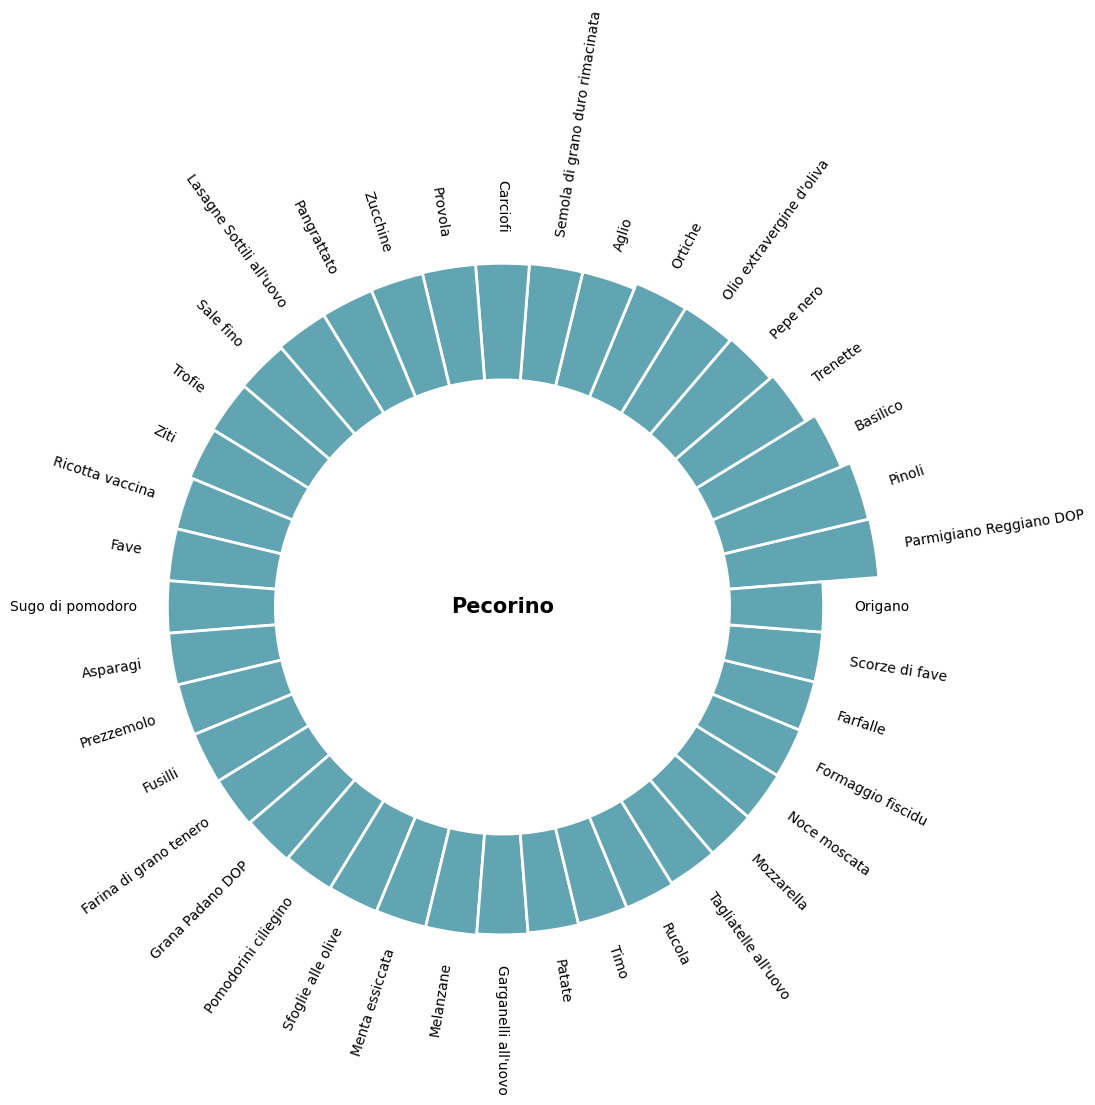

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 100
lowerLimit = 30
labelPadding = 4

# Compute max and min in the dataset
max = df3['Value'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max

# note 1-df3.Value
heights = slope * (1-df3.Value) + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df3.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df3.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#61a4b2",
)

# little space between the bar and the label
labelPadding = 4

#polar coo 0,0 is the center
plt.text(0,0,test_ingredient,
          bbox={'facecolor':'white','alpha':1,'edgecolor':'none','pad':1},fontsize=15,fontweight='bold',
          ha='center', va='center') 

# Add labels
for bar, angle, height, label in zip(bars, angles, heights, df3["Name"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 
    
plt.savefig('filename.png', format='png', transparent=True)

In [36]:
import pandas as pd
df2 = pd.DataFrame.from_dict(n_items)

In [37]:
df2.columns = ['Name', 'Value']

In [38]:
df2

Name     Value
0                          Pecorino  0.000000
1           Parmigiano Reggiano DOP  0.257160
2                            Pinoli  0.260652
3                          Basilico  0.293752
4                          Trenette  0.329869
5                         Pepe nero  0.341751
6         Olio extravergine d'oliva  0.346306
7                           Ortiche  0.348315
8                             Aglio  0.367364
9   Semola di grano duro rimacinata  0.368469
10                         Carciofi  0.370606
11                          Provola  0.371017
12                         Zucchine  0.373253
13                      Pangrattato  0.374972
14         Lasagne Sottili all'uovo  0.375574
15                        Sale fino  0.380842
16                           Trofie  0.383865
17                             Ziti  0.388649
18                  Ricotta vaccina  0.399004
19                             Fave  0.399163
20                 Sugo di pomodoro  0.399491
21                         Asparagi  0.400320
22                       Prezzemolo  0.404280
23                          Fusilli  0.404334
24           Farina di grano tenero  0.405556
25                 Grana Padano DOP  0.410164
26             Pomodorini ciliegino  0.415537
27               Sfoglie alle olive  0.417638
28                  Menta essiccata  0.419272
29                        Melanzane  0.419438
30              Garganelli all'uovo  0.423556
31                           Patate  0.427293
32                             Timo  0.431507
33                           Rucola  0.431667
34             Tagliatelle all'uovo  0.436787
35                       Mozzarella  0.437351
36                     Noce moscata  0.439681
37                Formaggio fiscidu  0.442365
38                         Farfalle  0.446052
39                   Scorze di fave  0.446075
40                          Origano  0.446138
41                         Bucatini  0.447628
42                  Pasta di pinoli  0.448886
43                        Pisellini  0.454673
44               Acciughe sott'olio  0.456735
45             Mezze Maniche Rigate  0.457714
46                            Acqua  0.459698
47                        Spaghetti  0.462269
48                   Pecorino sardo  0.465955
49               Asparagi selvatici  0.466745

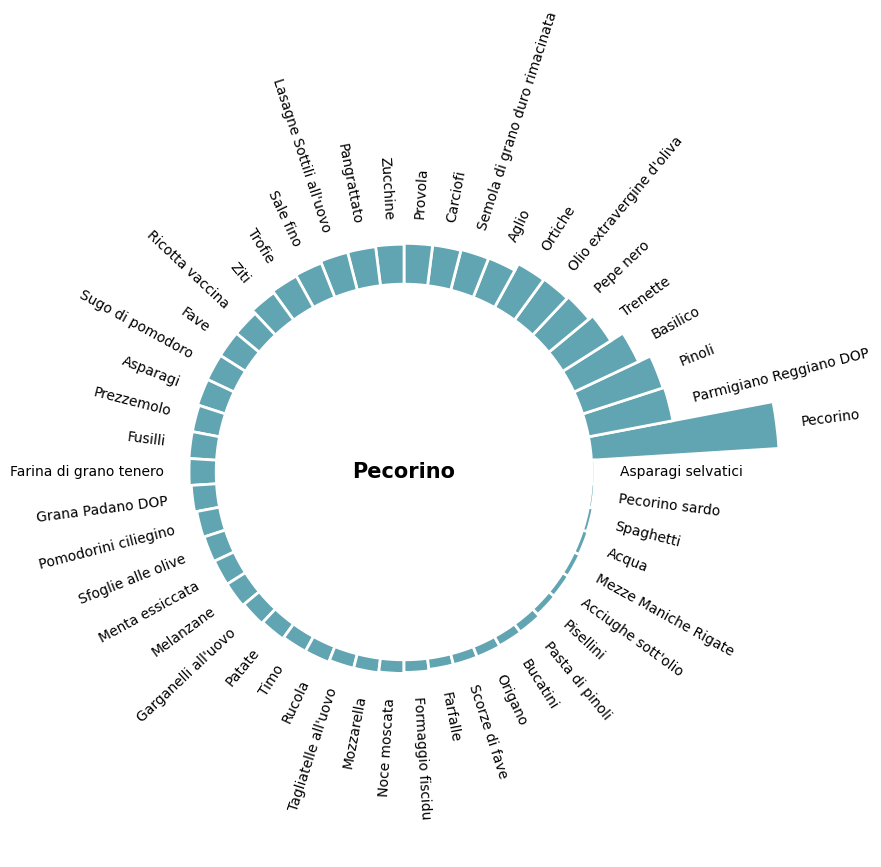

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 100
lowerLimit = 30
labelPadding = 4

# Compute max and min in the dataset
max = df2['Value'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df2.Value + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df2.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df2.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#61a4b2",
)

# little space between the bar and the label
labelPadding = 4

#polar coo 0,0 is the center
plt.text(0,0,df2.iloc[0]['Name'],
          bbox={'facecolor':'white','alpha':1,'edgecolor':'none','pad':1},fontsize=15,fontweight='bold',
          ha='center', va='center') 

# Add labels
for bar, angle, height, label in zip(bars, angles, heights, df2["Name"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

# First attempt to build a compound graph

GOAL: given a list of ingredients, linke them with their chemcial compounds. 

In [28]:
# https://towardsdatascience.com/language-translation-using-python-bd8020772ccc

print(model1.wv.index_to_key)

['Sale fino', "Olio extravergine d'oliva", 'Pepe nero', 'Farina 00', 'Uova', 'Burro', 'Acqua', 'Zucchero', 'Aglio', 'Latte intero', 'Panna fresca liquida', 'Zucchero a velo', 'Timo', 'Tuorli', 'Prezzemolo', 'Scorza di limone', 'Carote', 'Rosmarino', 'Lievito in polvere per dolci', 'Parmigiano Reggiano DOP', 'Grana Padano DOP', 'Basilico', 'Baccello di vaniglia', 'Patate', 'Vino bianco', 'Sedano', 'Noce moscata', 'Pangrattato', 'Succo di limone', 'Brodo vegetale', 'Zucchine', 'Cioccolato fondente', 'Zucchero di canna', 'Menta', 'Passata di pomodoro', 'Scalogno', 'Salvia', 'Amido di mais (maizena)', 'Cipolle', 'Cacao amaro in polvere', 'Peperoncino fresco', 'Pomodorini ciliegino', 'Ricotta vaccina', 'Alloro', 'Cipolle bianche', 'Origano', 'Olio di semi', 'Olio di semi di arachide', 'Albumi', 'Erba cipollina', "Scorza d'arancia", 'Gelatina in fogli', 'Farina Manitoba', 'Cannella in polvere', 'Lievito di birra secco', 'Pinoli', 'Porri', 'Lievito di birra fresco', 'Maggiorana', 'Cipolle ros

In [37]:
import translators as ts
import translators.server as tss

ingredients = []

for it_ing in model1.wv.index_to_key:
    en_ing = tss.google(it_ing, from_language='it', to_language='en')
    ingredients.append(en_ing)

In [38]:
print(ingredients)

['Fine salt', 'Extra virgin olive oil', 'black pepper', 'Flour 00', 'Egg', 'Butter', 'Waterfall', 'Sugar', 'Garlic', 'Whole milk', 'Fresh liquid cream', 'Powdered sugar', 'thyme', 'Yolks', 'Parsley', 'Lemon peel', 'Carrots', 'Rosemary', 'Dust for sweet baking powder', 'Parmigiano Reggiano Dop', 'Grana Padano DOP', 'Basil', 'Vanilla pod', 'Potatoes', 'White wine', 'Celery', 'Nutmeg', 'Bread crumbs', 'Lemon juice', 'Vegetable broth', 'Zucchini', 'Dark chocolate', 'Sugar cane', 'Mint', 'Tomato puree', 'Shallot', 'Sage', 'Corn starch (cornstarch)', 'Onion', 'Unsweetened cocoa powder', 'Fresh chilli', 'Cherry tomatoes', 'Vaccine ricotta', 'Laurel', 'White onions', 'Origan', 'Seed oil', 'Peanut oil', 'Egg whites', 'Chives', 'Orange peel', 'Gelatin sheets', 'Manitoba flour', 'Cinnamon powder', 'Dry beer yeast', 'Pine nuts', 'Leeks', "Fresh brewer's yeast", 'Marjoram', 'Red onions', 'Eggplant', 'Honey', 'Red peppers', 'Fresh spring onion', 'Sunflower oil', 'Salt', 'Sausage', 'Lemons', 'Carnaro

In [41]:
import csv
with open('ingredients_en.csv', 'w', newline='') as myfile:
     wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
     wr.writerow(ingredients)
    
with open('ingredients_ita.csv', 'w', newline='') as myfile:
     wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
     wr.writerow(model1.wv.index_to_key)

In [42]:
df_ing = pd.DataFrame(list(zip(model1.wv.index_to_key, ingredients)),
               columns =['ita', 'en'])

In [43]:
df_ing

ita                      en
0                     Sale fino               Fine salt
1     Olio extravergine d'oliva  Extra virgin olive oil
2                     Pepe nero            black pepper
3                     Farina 00                Flour 00
4                          Uova                     Egg
...                         ...                     ...
1670      Cioccolato bianco 35%     35% white chocolate
1671    Melone giallo invernale     Winter yellow melon
1672             Latte scremato            Skimmed milk
1673        Bistecca Fiorentina        Florentine steak
1674    Cioccolato al latte 40%      Milk chocolate 40%

[1675 rows x 2 columns]

In [44]:
df_ing.to_csv("ita_en_ingredients.csv",index=False)

In [2]:
import pandas as pd
df_inf_flavor = pd.read_json(r"ita_en_ingredients_compounds.json",orient="records")

In [3]:
df_inf_flavor

ita                      en  flavor index   id  \
0                     Sale fino               Fine salt           765  778   
1     Olio extravergine d'oliva  Extra virgin olive oil           307  307   
2                     Pepe nero            black pepper           339  339   
3                     Farina 00                Flour 00           886  920   
4                          Uova                     Egg             0    0   
...                         ...                     ...           ...  ...   
1670      Cioccolato bianco 35%     35% white chocolate           792  817   
1671    Melone giallo invernale     Winter yellow melon           191  191   
1672             Latte scremato            Skimmed milk            93   93   
1673        Bistecca Fiorentina        Florentine steak           270  270   
1674    Cioccolato al latte 40%      Milk chocolate 40%           792  817   

                                         molucules list  
0                            [1130, 6202, 644104, 8094]  
1     [323, 7150, 8468, 11509, 12613, 637566, 439341...  
2     [323, 6989, 7150, 61362, 442355, 11509, 642845...  
3                                  [1130, 644104, 8094]  
4     [6322, 6736, 31252, 7909, 7284, 7501, 9609, 12...  
...                                                 ...  
1670  [9064, 72276, 65064, 107905, 5280343, 445154, ...  
1671  [7795, 22873, 323, 107971, 12209, 222656, 7284...  
1672             [6430188, 7222, 5634, 5363231, 249494]  
1673  [20083, 7501, 643731, 11509, 985, 1123, 6584, ...  
1674  [9064, 72276, 65064, 107905, 5280343, 445154, ...  

[1675 rows x 5 columns]

In [4]:
import networkx as nx
G = nx.read_gexf("data/gz_graph_weighted.gexf")

In [5]:
G.edges

EdgeView([('Ceci precotti', 'Succo di limone'), ('Ceci precotti', 'Tahina'), ('Ceci precotti', 'Aglio'), ('Ceci precotti', "Olio extravergine d'oliva"), ('Ceci precotti', 'Acqua'), ('Ceci precotti', 'Sale fino'), ('Ceci precotti', 'Paprika dolce'), ('Ceci precotti', 'Prezzemolo'), ('Ceci precotti', 'Pepe nero'), ('Ceci precotti', 'Semi di sesamo'), ('Ceci precotti', 'Olio di sesamo'), ('Ceci precotti', 'Pane bianco in cassetta'), ('Ceci precotti', 'Grana Padano DOP'), ('Ceci precotti', 'Uova'), ('Ceci precotti', 'Concentrato di pomodoro'), ('Ceci precotti', 'Senape'), ('Ceci precotti', 'Aglio in polvere'), ('Ceci precotti', 'Scamorza (provola)'), ('Ceci precotti', 'Pangrattato'), ('Ceci precotti', 'Olio di semi di arachide'), ('Ceci precotti', 'Ceci secchi'), ('Ceci precotti', 'Cipolle bianche'), ('Ceci precotti', 'Cumino'), ('Ceci precotti', 'Yogurt greco'), ('Ceci precotti', 'Tabasco®'), ('Ceci precotti', 'Paprika affumicata'), ('Ceci precotti', 'Sale'), ('Ceci precotti', 'Menta'), (

In [10]:
G.nodes

NodeView(('Ceci precotti', 'Succo di limone', 'Tahina', 'Aglio', "Olio extravergine d'oliva", 'Acqua', 'Sale fino', 'Paprika dolce', 'Prezzemolo', 'Pepe nero', 'Semi di sesamo', 'Olio di sesamo', 'Farina 00', 'Farina Manitoba', 'Malto', 'Lievito di birra fresco', 'Sale', 'Maiale', 'Cavolo cappuccio', 'Cipollotto fresco', 'Vino di riso', 'Salsa di soia', 'Pepe bianco', 'Avocado', 'Cipolle bianche', 'Succo di lime', 'Coriandolo', 'Pomodori ramati', "Tonno sott'olio", 'Ricotta vaccina', 'Acciughe (alici)', 'Capperi sotto sale', 'Pangrattato', 'Uova', 'Parmigiano Reggiano DOP', 'Olio di semi di arachide', 'Zafferano', 'Burro', 'Riso vialone nano', 'Caciocavallo', 'Cipolle', 'Passata di pomodoro', 'Pisellini', 'Vino rosso', 'Prosciutto cotto', 'Mozzarella', 'Olio di semi', 'Sfoglie per involtini', 'Carote', 'Albumi', 'Zucchero', 'Fiordilatte', 'Origano', 'Pane bianco in cassetta', 'Mozzarella di bufala', 'Olio di semi di girasole', 'Vitello', 'Sedano', 'Cipolle dorate', 'Vino bianco', 'Allo

In [7]:
all_edges = []
for index, row in df_inf_flavor.iterrows():
    for molecule in row['molucules list']:
        all_edges.append((row['ita'],molecule))

In [8]:
all_edges

[('Sale fino', 1130),
 ('Sale fino', 6202),
 ('Sale fino', 644104),
 ('Sale fino', 8094),
 ("Olio extravergine d'oliva", 323),
 ("Olio extravergine d'oliva", 7150),
 ("Olio extravergine d'oliva", 8468),
 ("Olio extravergine d'oliva", 11509),
 ("Olio extravergine d'oliva", 12613),
 ("Olio extravergine d'oliva", 637566),
 ("Olio extravergine d'oliva", 439341),
 ("Olio extravergine d'oliva", 33931),
 ("Olio extravergine d'oliva", 6072),
 ("Olio extravergine d'oliva", 72277),
 ("Olio extravergine d'oliva", 25310),
 ("Olio extravergine d'oliva", 878),
 ("Olio extravergine d'oliva", 5281708),
 ("Olio extravergine d'oliva", 240),
 ("Olio extravergine d'oliva", 244),
 ("Olio extravergine d'oliva", 5283339),
 ("Olio extravergine d'oliva", 441484),
 ("Olio extravergine d'oliva", 1889),
 ("Olio extravergine d'oliva", 7655),
 ("Olio extravergine d'oliva", 4788),
 ("Olio extravergine d'oliva", 6184),
 ("Olio extravergine d'oliva", 11128),
 ("Olio extravergine d'oliva", 8723),
 ("Olio extravergine d

In [9]:
for e in all_edges:
    if (G.has_edge(e[0],e[1])):
        w = G.edges[e[0],e[1]]['weight']
        G.add_edge(e[0],e[1], weight=w+1)
    else:
        G.add_edge(e[0],e[1], weight=1)

In [11]:
nx.write_gexf(G, "gz_flavor_graph_weighted.gexf")

In [6]:
import networkx as nx
G = nx.read_gexf("gz_flavor_graph_weighted.gexf")

In [14]:
#nx.write_weighted_edgelist(G, "gz_flavor_graph_weighted.el")
nx.write_edgelist(G, "gz_flavor.edgelist", encoding = 'utf-8',delimiter="-")

In [1]:
!pip install pecanpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 553.7 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.6/34.6 MB 307.7 kB/s eta 0:00:00m eta 0:00:010:00:04


In [2]:
!pip install typing-extensions

In [3]:
# generate random walks
from pecanpy import pecanpy as node2vec
g = node2vec.PreComp(p=0.5, q=1, workers=4, verbose=True)

In [17]:
g.read_edg("gz_flavor.edgelist", weighted=False, directed=False, delimiter="-")

In [18]:
g.preprocess_transition_probs()

In [19]:
emd = g.embed()

  0%|                                                 | 0/32610 [00:00<?, ?it/s]

In [22]:
emd.shape

(3261, 128)

In [27]:
g.nodes

['Ceci precotti',
 'Succo di limone',
 'Tahina',
 'Aglio',
 "Olio extravergine d'oliva",
 'Acqua',
 'Sale fino',
 'Paprika dolce',
 'Prezzemolo',
 'Pepe nero',
 'Semi di sesamo',
 'Olio di sesamo',
 'Pane bianco in cassetta',
 'Grana Padano DOP',
 'Uova',
 'Concentrato di pomodoro',
 'Senape',
 'Aglio in polvere',
 'Scamorza (provola)',
 'Pangrattato',
 'Olio di semi di arachide',
 'Ceci secchi',
 'Cipolle bianche',
 'Cumino',
 'Yogurt greco',
 'Tabasco®',
 'Paprika affumicata',
 'Sale',
 'Menta',
 'Olio di semi',
 'Timo',
 'Ricotta vaccina',
 'Pomodori ramati',
 'Semi di finocchio',
 'Cipolle rosse',
 'Peperoncino fresco',
 'Piselli surgelati',
 'Farina 00',
 'Rosmarino',
 'Origano',
 'Barbabietole precotte',
 'Peperoncino',
 'Gamberi',
 'Gamberetti',
 'Scalogno',
 'Burro',
 'Pancarrè',
 'Olio di oliva',
 'Farina Manitoba',
 'Malto',
 'Lievito di birra secco',
 "Pomodori secchi sott'olio",
 'Coriandolo',
 'Rucola',
 'Formaggio fresco spalmabile',
 'Latte intero',
 'Curcuma in polvere'

In [28]:
g.num_nodes

3261

In [29]:
# generate random walks
walks = g.simulate_walks(num_walks=10, walk_length=80)

  0%|                                                 | 0/32610 [00:00<?, ?it/s]

In [32]:
from gensim.models import Word2Vec

In [33]:
# use random walks to train embeddings
w2v_model = Word2Vec(walks, vector_size=8, window=3, min_count=0, sg=1, workers=1, epochs=1)

In [45]:
w2v_model.save("word2vec_ing_mol.model")

In [46]:
w2v_model = Word2Vec.load("word2vec_ing_mol.model")

In [35]:
vector = w2v_model.wv['Olio di sesamo']

In [65]:
sims = w2v_model.wv.most_similar('Maiale', topn=20)  # get other similar words

In [66]:
sims

[('Carne di suino', 0.9930323362350464),
 ('Lonza di maiale', 0.9921379089355469),
 ('Pancetta affumicata', 0.988030195236206),
 ('Pancetta', 0.9864535331726074),
 ('Pancetta (tesa)', 0.9861775636672974),
 ('Pancetta dolce', 0.9807331562042236),
 ('Pollo', 0.979524552822113),
 ('Costine di maiale', 0.9789690375328064),
 ('Bacon', 0.9757653474807739),
 ('Carne bovina', 0.9648508429527283),
 ('Cotenna di suino', 0.9594774842262268),
 ('Cosce di tacchino', 0.9584541916847229),
 ('Biancostato di manzo', 0.9567714929580688),
 ('Brodo di carne', 0.952612042427063),
 ('Fettine di manzo', 0.9522712826728821),
 ('Gallinella', 0.9496800899505615),
 ('Macinato di maiale', 0.9466198682785034),
 ('Stinco di maiale', 0.9446510672569275),
 ('Controfiletto di manzo', 0.9444142580032349),
 ('Braciole di maiale', 0.9414982795715332)]

In [49]:
G = nx.read_gexf("data/gz_graph_weighted.gexf")

In [50]:
nx.write_edgelist(G, "gz.edgelist", encoding = 'utf-8',delimiter="-")

In [51]:
g = node2vec.PreComp(p=0.5, q=1, workers=4, verbose=True)

In [52]:
g.read_edg("gz.edgelist", weighted=False, directed=False, delimiter="-")

In [53]:
g.preprocess_transition_probs()

In [54]:
walks = g.simulate_walks(num_walks=10, walk_length=80)

  0%|                                                 | 0/16770 [00:00<?, ?it/s]

In [55]:
w2v_model1 = Word2Vec(walks, vector_size=8, window=3, min_count=0, sg=1, workers=1, epochs=1)

In [56]:
w2v_model1.save("word2vec_ing.model")

In [57]:
w2v_model1 = Word2Vec.load("word2vec_ing.model")

In [67]:
sims1 = w2v_model1.wv.most_similar('Maiale', topn=20) 

In [68]:
sims1

[('Semi di finocchio', 0.980127215385437),
 ('Pepe', 0.953659176826477),
 ('Zafferano in pistilli', 0.941005289554596),
 ('Bietole', 0.9374010562896729),
 ('Brodo', 0.9373845458030701),
 ('Lenticchie', 0.9365308880805969),
 ('Pancetta', 0.9353411197662354),
 ('Riso', 0.9308798909187317),
 ('Vino', 0.9241116642951965),
 ('Riso Carnaroli', 0.923587441444397),
 ('Verza', 0.9218123555183411),
 ('Pancetta (tesa)', 0.9167736768722534),
 ('Olio di oliva', 0.9165005087852478),
 ('Ginepro', 0.915462851524353),
 ('Pane pugliese', 0.9114724397659302),
 ('Manzo', 0.909596860408783),
 ('Pancetta affumicata', 0.9064990878105164),
 ('Vino bianco secco', 0.9050505757331848),
 ('Carne di suino', 0.9049904346466064),
 ('Cavolfiore', 0.904522716999054)]

In [70]:
import pickle

with open('emedding_model_ing_mol_node2vec.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    model2 = pickle.load(f)

TypeError: __randomstate_ctor() takes from 0 to 1 positional arguments but 2 were given

In [76]:
import pickle

# open a file, where you stored the pickled data
file = open('emedding_model_ing_mol_node2vec.pickle', 'rb')

# dump information to that file
data = pickle.load(file)

# close the file
file.close()

TypeError: __randomstate_ctor() takes from 0 to 1 positional arguments but 2 were given

In [77]:
model3 = pickle.load(open('emedding_model_ing_mol_node2vec.pickle',"rb"))

TypeError: __randomstate_ctor() takes from 0 to 1 positional arguments but 2 were given

In [78]:
model3 = pickle.load(open('/home/andrea/Downloads/emedding_model.pickle',"rb"))

TypeError: __randomstate_ctor() takes from 0 to 1 positional arguments but 2 were given